In [2]:
#Academic Integrity Statement
# I certify that the code and data in this assignment were generated independently, using only
# the tools and resources defined in the course and that I did not receieve any external help,
# coaching or contributuion during the production of this work. 

# Part III Building a CNN model



In [3]:
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from sklearn.model_selection import StratifiedKFold
import tensorflow as tf
from tensorflow.keras.regularizers import l2
from tensorflow.keras.datasets import mnist

In [4]:
X, y = tf.keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [5]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [6]:
x_test.shape

(10000, 28, 28)

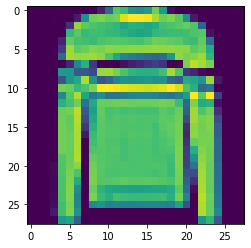

In [7]:
import matplotlib.pyplot as plt
#plot the first image in the dataset
plt.imshow(x_train[5])

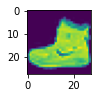

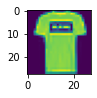

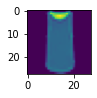

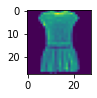

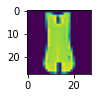

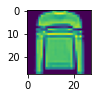

In [13]:
import matplotlib.pyplot as plt
#plot the first image in the dataset
for i in range(6):
  plt.subplot(330+1+i)
  plt.imshow(x_train[i])
  plt.show()

In [ ]:
x_train[0].shape

(28, 28)

### Reshaping the dataset

In [ ]:
df_train = x_train.reshape(60000,28,28,1)
df_test = x_test.reshape(10000,28,28,1)

In [ ]:
df = np.concatenate([df_train, df_test], axis=0)

In [ ]:
y_test.shape

(10000,)

In [ ]:
dfY = np.concatenate([y_train, y_test], axis=0)

In [ ]:
dfY.shape

(70000,)

In [ ]:
df.shape

(70000, 28, 28, 1)

In [ ]:
# !pip install keras.utils

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
df_ytrain = to_categorical(y_train)
df_ytest = to_categorical(y_test)

In [ ]:
df_ytest[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

## Building the Model

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from keras.layers import BatchNormalization

Epoch 1/5
469/469 [==============================] - 11s 22ms/step - loss: 0.8163 - accuracy: 0.8294 - val_loss: 0.3565 - val_accuracy: 0.8724
Epoch 2/5
469/469 [==============================] - 10s 21ms/step - loss: 0.3069 - accuracy: 0.8887 - val_loss: 0.3264 - val_accuracy: 0.8834
Epoch 3/5
469/469 [==============================] - 10s 21ms/step - loss: 0.2555 - accuracy: 0.9067 - val_loss: 0.3048 - val_accuracy: 0.8902
Epoch 4/5
469/469 [==============================] - 10s 21ms/step - loss: 0.2186 - accuracy: 0.9183 - val_loss: 0.3112 - val_accuracy: 0.8928
Epoch 5/5
469/469 [==============================] - 10s 21ms/step - loss: 0.1949 - accuracy: 0.9275 - val_loss: 0.3128 - val_accuracy: 0.8954


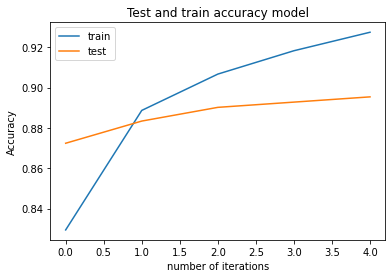

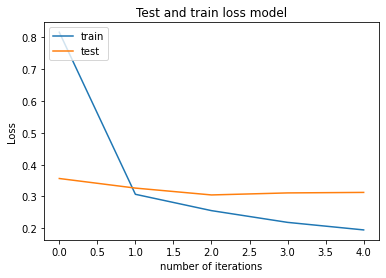

313/313 [==============================] - 2s 5ms/step - loss: 0.3128 - accuracy: 0.8954
Test loss:  0.3128252327442169
Test accuracy:  0.8953999876976013
[9 2 1 1 6]
[9 2 1 1 6]


In [ ]:
model = Sequential()
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.02))
model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.02))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='Nadam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(df_train, df_ytrain, validation_data=(df_test, df_ytest), epochs=5, batch_size=128)

## plotting the accuracy model
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Test and train accuracy model')
plt.ylabel('Accuracy')
plt.xlabel('number of iterations')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

print('\n')

## plotting the loss model
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Test and train loss model')
plt.ylabel('Loss')
plt.xlabel('number of iterations')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

score = model.evaluate(df_test, df_ytest)

print('Test loss: ' ,score[0])
print('Test accuracy: ' ,score[1])

ypred = model.predict(df_test)

print(np.argmax(ypred, axis=1)[:5])
print(np.argmax(df_ytest, axis=1)[:5])

## Adding the improvements methods

Epoch 1/5
469/469 [==============================] - 14s 23ms/step - loss: 0.9144 - accuracy: 0.8202 - val_loss: 0.3686 - val_accuracy: 0.8685
Epoch 2/5
469/469 [==============================] - 10s 21ms/step - loss: 0.3094 - accuracy: 0.8891 - val_loss: 0.3410 - val_accuracy: 0.8759
Epoch 3/5
469/469 [==============================] - 10s 21ms/step - loss: 0.2505 - accuracy: 0.9089 - val_loss: 0.2896 - val_accuracy: 0.9008
Epoch 4/5
469/469 [==============================] - 10s 21ms/step - loss: 0.2133 - accuracy: 0.9215 - val_loss: 0.2875 - val_accuracy: 0.9009
Epoch 5/5
469/469 [==============================] - 10s 21ms/step - loss: 0.1847 - accuracy: 0.9303 - val_loss: 0.2865 - val_accuracy: 0.9076
5


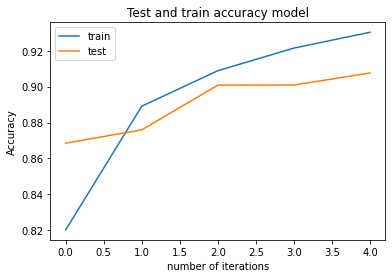

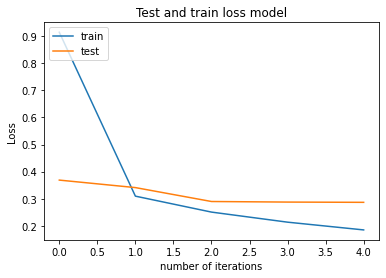

313/313 [==============================] - 2s 5ms/step - loss: 0.2865 - accuracy: 0.9076
Test loss:  0.28654396533966064
Test accuracy:  0.9075999855995178
[9 2 1 1 6]
[9 2 1 1 6]


In [ ]:
## adding earlystopping

callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)


model = Sequential()

model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.02))
model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.02))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='Nadam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(df_train, df_ytrain, validation_data=(df_test, df_ytest), epochs=5, batch_size=128, callbacks=[callback])

#calculating the number of epochs run
print(len(history.history['loss']))

## plotting the accuracy model
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Test and train accuracy model')
plt.ylabel('Accuracy')
plt.xlabel('number of iterations')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

print('\n')

## plotting the loss model
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Test and train loss model')
plt.ylabel('Loss')
plt.xlabel('number of iterations')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

score = model.evaluate(df_test, df_ytest)

print('Test loss: ' ,score[0])
print('Test accuracy: ' ,score[1])

ypred = model.predict(df_test)

print(np.argmax(ypred, axis=1)[:5])
print(np.argmax(df_ytest, axis=1)[:5])

In [ ]:
## Adding regularization

In [ ]:
df_train.shape

(60000, 28, 28, 1)

Epoch 1/5
469/469 [==============================] - 13s 23ms/step - loss: 0.7816 - accuracy: 0.8284 - val_loss: 0.4144 - val_accuracy: 0.8656
Epoch 2/5
469/469 [==============================] - 10s 21ms/step - loss: 0.3388 - accuracy: 0.8903 - val_loss: 0.3764 - val_accuracy: 0.8785
Epoch 3/5
469/469 [==============================] - 10s 22ms/step - loss: 0.2789 - accuracy: 0.9092 - val_loss: 0.3315 - val_accuracy: 0.8918
Epoch 4/5
469/469 [==============================] - 10s 21ms/step - loss: 0.2499 - accuracy: 0.9190 - val_loss: 0.3108 - val_accuracy: 0.9033
Epoch 5/5
469/469 [==============================] - 10s 21ms/step - loss: 0.2103 - accuracy: 0.9316 - val_loss: 0.3322 - val_accuracy: 0.9043
5


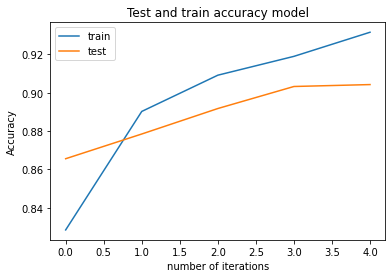

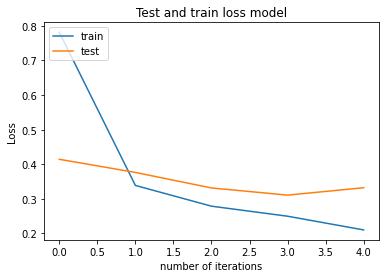

313/313 [==============================] - 2s 5ms/step - loss: 0.3322 - accuracy: 0.9043
Test loss:  0.33220067620277405
Test accuracy:  0.9042999744415283
[9 2 1 1 6]
[9 2 1 1 6]


In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)


model = Sequential()

model.add(Conv2D(64, kernel_size=3,kernel_regularizer=l2(1e-3), activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=3,kernel_regularizer=l2(1e-3) ,activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.02))
model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.02))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='Nadam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(df_train, df_ytrain, validation_data=(df_test, df_ytest), epochs=5, batch_size=128, callbacks=[callback])

#calculating the number of epochs run
print(len(history.history['loss']))

## plotting the accuracy model
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Test and train accuracy model')
plt.ylabel('Accuracy')
plt.xlabel('number of iterations')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

print('\n')

## plotting the loss model
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Test and train loss model')
plt.ylabel('Loss')
plt.xlabel('number of iterations')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

score = model.evaluate(df_test, df_ytest)

print('Test loss: ' ,score[0])
print('Test accuracy: ' ,score[1])

ypred = model.predict(df_test)

print(np.argmax(ypred, axis=1)[:5])
print(np.argmax(df_ytest, axis=1)[:5])

In [ ]:
## Batch normalization 

Epoch 1/5
469/469 [==============================] - 13s 24ms/step - loss: 0.4507 - accuracy: 0.8543 - val_loss: 0.3495 - val_accuracy: 0.8866
Epoch 2/5
469/469 [==============================] - 11s 23ms/step - loss: 0.2873 - accuracy: 0.9076 - val_loss: 0.3050 - val_accuracy: 0.9014
Epoch 3/5
469/469 [==============================] - 11s 23ms/step - loss: 0.2323 - accuracy: 0.9251 - val_loss: 0.2897 - val_accuracy: 0.9059
Epoch 4/5
469/469 [==============================] - 11s 23ms/step - loss: 0.1976 - accuracy: 0.9370 - val_loss: 0.2720 - val_accuracy: 0.9151
Epoch 5/5
469/469 [==============================] - 11s 23ms/step - loss: 0.1705 - accuracy: 0.9442 - val_loss: 0.2806 - val_accuracy: 0.9106
5


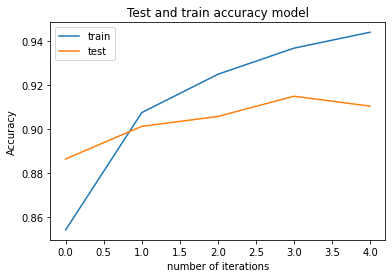

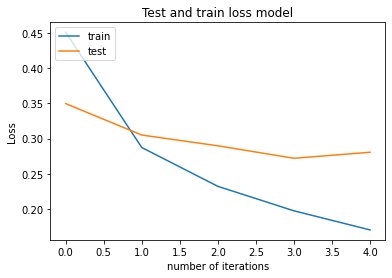

313/313 [==============================] - 2s 5ms/step - loss: 0.2806 - accuracy: 0.9106
Test loss:  0.2805601954460144
Test accuracy:  0.9106000065803528
[9 2 1 1 6]
[9 2 1 1 6]


In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)


model = Sequential()

model.add(Conv2D(64, kernel_size=3,kernel_regularizer=l2(1e-3), activation='relu', input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=3,kernel_regularizer=l2(1e-3) ,activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.02))
model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.02))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='Nadam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(df_train, df_ytrain, validation_data=(df_test, df_ytest), epochs=5, batch_size=128, callbacks=[callback])

#calculating the number of epochs run
print(len(history.history['loss']))

## plotting the accuracy model
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Test and train accuracy model')
plt.ylabel('Accuracy')
plt.xlabel('number of iterations')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

print('\n')

## plotting the loss model
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Test and train loss model')
plt.ylabel('Loss')
plt.xlabel('number of iterations')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

score = model.evaluate(df_test, df_ytest)

print('Test loss: ' ,score[0])
print('Test accuracy: ' ,score[1])

ypred = model.predict(df_test)

print(np.argmax(ypred, axis=1)[:5])
print(np.argmax(df_ytest, axis=1)[:5])

In [ ]:
## Kfold cross validation

In [ ]:
# convert from integers to floats
train_norm = df_train.astype('float32')
test_norm = df_test.astype('float32')
# normalize to range 0-1
train_norm = train_norm / 255.0
test_norm = test_norm / 255.0

In [ ]:
from sklearn.model_selection import KFold

Epoch 1/5
375/375 [==============================] - 12s 27ms/step - loss: 0.4880 - accuracy: 0.8439 - val_loss: 0.3376 - val_accuracy: 0.8905
Epoch 2/5
375/375 [==============================] - 10s 27ms/step - loss: 0.3046 - accuracy: 0.9019 - val_loss: 0.3162 - val_accuracy: 0.8960
Epoch 3/5
375/375 [==============================] - 10s 27ms/step - loss: 0.2507 - accuracy: 0.9190 - val_loss: 0.2950 - val_accuracy: 0.9050
Epoch 4/5
375/375 [==============================] - 11s 29ms/step - loss: 0.2150 - accuracy: 0.9308 - val_loss: 0.2676 - val_accuracy: 0.9097
Epoch 5/5
375/375 [==============================] - 10s 28ms/step - loss: 0.1834 - accuracy: 0.9418 - val_loss: 0.2840 - val_accuracy: 0.9079


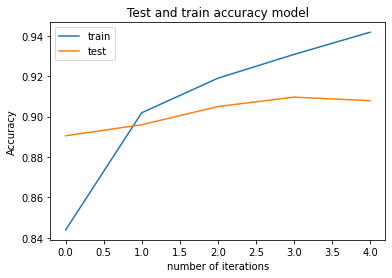

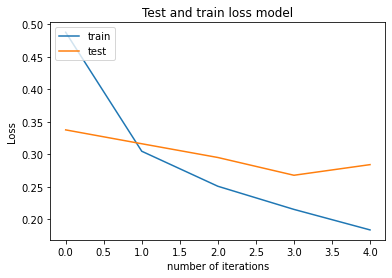

375/375 [==============================] - 2s 5ms/step - loss: 0.2840 - accuracy: 0.9079
Test accuracy:  0.9079166650772095
Epoch 1/5
375/375 [==============================] - 12s 28ms/step - loss: 0.5005 - accuracy: 0.8416 - val_loss: 0.3359 - val_accuracy: 0.8939
Epoch 2/5
375/375 [==============================] - 11s 29ms/step - loss: 0.3087 - accuracy: 0.9026 - val_loss: 0.2983 - val_accuracy: 0.9032
Epoch 3/5
375/375 [==============================] - 10s 27ms/step - loss: 0.2514 - accuracy: 0.9195 - val_loss: 0.2785 - val_accuracy: 0.9119
Epoch 4/5
375/375 [==============================] - 11s 29ms/step - loss: 0.2149 - accuracy: 0.9317 - val_loss: 0.2590 - val_accuracy: 0.9180
Epoch 5/5
375/375 [==============================] - 11s 28ms/step - loss: 0.1850 - accuracy: 0.9411 - val_loss: 0.2740 - val_accuracy: 0.9126


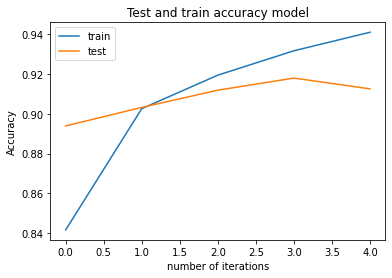

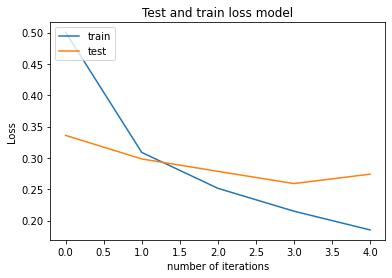

375/375 [==============================] - 2s 5ms/step - loss: 0.2740 - accuracy: 0.9126
Test accuracy:  0.9125833511352539
Epoch 1/5
375/375 [==============================] - 12s 29ms/step - loss: 0.4955 - accuracy: 0.8391 - val_loss: 0.3511 - val_accuracy: 0.8897
Epoch 2/5
375/375 [==============================] - 11s 29ms/step - loss: 0.3077 - accuracy: 0.9009 - val_loss: 0.3006 - val_accuracy: 0.9030
Epoch 3/5
375/375 [==============================] - 11s 29ms/step - loss: 0.2553 - accuracy: 0.9175 - val_loss: 0.2811 - val_accuracy: 0.9086
Epoch 4/5
375/375 [==============================] - 10s 28ms/step - loss: 0.2137 - accuracy: 0.9304 - val_loss: 0.2769 - val_accuracy: 0.9124
Epoch 5/5
375/375 [==============================] - 10s 28ms/step - loss: 0.1886 - accuracy: 0.9396 - val_loss: 0.2649 - val_accuracy: 0.9208


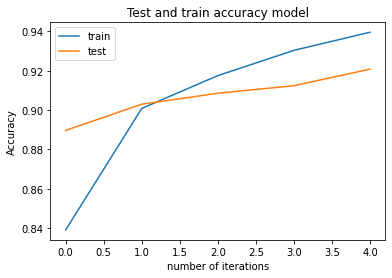

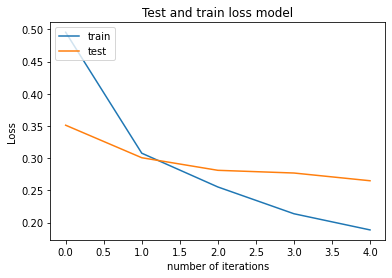

375/375 [==============================] - 2s 5ms/step - loss: 0.2649 - accuracy: 0.9208
Test accuracy:  0.9208333492279053
Epoch 1/5
375/375 [==============================] - 12s 28ms/step - loss: 0.4767 - accuracy: 0.8473 - val_loss: 0.3844 - val_accuracy: 0.8742
Epoch 2/5
375/375 [==============================] - 10s 27ms/step - loss: 0.3029 - accuracy: 0.9020 - val_loss: 0.3023 - val_accuracy: 0.9006
Epoch 3/5
375/375 [==============================] - 11s 29ms/step - loss: 0.2454 - accuracy: 0.9204 - val_loss: 0.2912 - val_accuracy: 0.9082
Epoch 4/5
375/375 [==============================] - 10s 27ms/step - loss: 0.2088 - accuracy: 0.9336 - val_loss: 0.2744 - val_accuracy: 0.9138
Epoch 5/5
375/375 [==============================] - 11s 29ms/step - loss: 0.1812 - accuracy: 0.9421 - val_loss: 0.2806 - val_accuracy: 0.9154


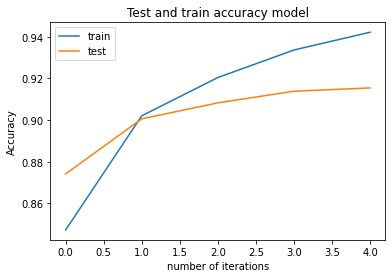

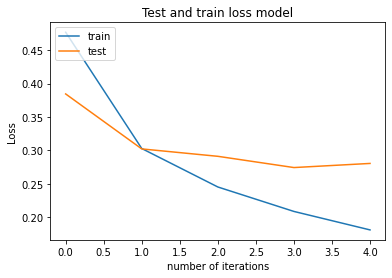

375/375 [==============================] - 2s 5ms/step - loss: 0.2806 - accuracy: 0.9154
Test accuracy:  0.9154166579246521
Epoch 1/5
375/375 [==============================] - 13s 30ms/step - loss: 0.4903 - accuracy: 0.8433 - val_loss: 0.3317 - val_accuracy: 0.8953
Epoch 2/5
375/375 [==============================] - 11s 29ms/step - loss: 0.3064 - accuracy: 0.9014 - val_loss: 0.3027 - val_accuracy: 0.9057
Epoch 3/5
375/375 [==============================] - 11s 29ms/step - loss: 0.2521 - accuracy: 0.9187 - val_loss: 0.2817 - val_accuracy: 0.9120
Epoch 4/5
375/375 [==============================] - 10s 27ms/step - loss: 0.2121 - accuracy: 0.9322 - val_loss: 0.2770 - val_accuracy: 0.9140
Epoch 5/5
375/375 [==============================] - 11s 29ms/step - loss: 0.1838 - accuracy: 0.9416 - val_loss: 0.2945 - val_accuracy: 0.9108


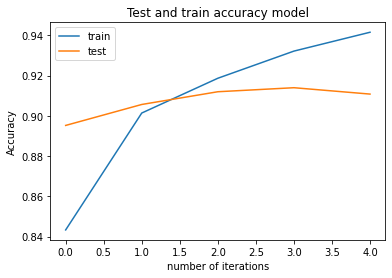

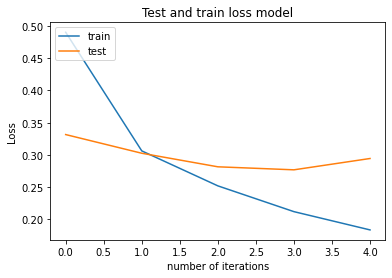

375/375 [==============================] - 2s 5ms/step - loss: 0.2945 - accuracy: 0.9108
Test accuracy:  0.9108333587646484


In [ ]:
scores, histories = list(), list()
kfold = KFold(5, shuffle=True, random_state=1)

callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)

for train_ix, test_ix in kfold.split(df_train):

  ## define model
  model = Sequential()

  model.add(Conv2D(64, kernel_size=3,kernel_regularizer=l2(1e-3), activation='relu', input_shape=(28,28,1)))
  model.add(BatchNormalization())
  model.add(Conv2D(32, kernel_size=3,kernel_regularizer=l2(1e-3) ,activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.02))
  model.add(Flatten())
  model.add(Dense(64, activation = 'relu'))
  model.add(Dropout(0.02))
  model.add(Dense(10, activation='softmax'))

  model.compile(optimizer='Nadam', loss='categorical_crossentropy', metrics=['accuracy'])

  trainX, trainY, testX, testY = df_train[train_ix], df_ytrain[train_ix], df_train[test_ix], df_ytrain[test_ix]

  history = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=5, batch_size=128, callbacks=[callback])

  ## plotting the accuracy model
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('Test and train accuracy model')
  plt.ylabel('Accuracy')
  plt.xlabel('number of iterations')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()

  print('\n')

  ## plotting the loss model
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Test and train loss model')
  plt.ylabel('Loss')
  plt.xlabel('number of iterations')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()

  score = model.evaluate(testX, testY)

  print('Test accuracy: ' ,score[1])

  ypred = model.predict(testX)

  # print(np.argmax(ypred, axis=1)[:5])
  # print(np.argmax(df_ytest, axis=1)[:5])



# Part IV CNN Optimization

## Kernel Initializer

In [ ]:
# he_uniform

Epoch 1/5
469/469 [==============================] - 13s 24ms/step - loss: 0.5516 - accuracy: 0.8554 - val_loss: 0.4143 - val_accuracy: 0.8924
Epoch 2/5
469/469 [==============================] - 11s 23ms/step - loss: 0.3470 - accuracy: 0.9106 - val_loss: 0.3762 - val_accuracy: 0.8974
Epoch 3/5
469/469 [==============================] - 11s 23ms/step - loss: 0.2807 - accuracy: 0.9256 - val_loss: 0.3219 - val_accuracy: 0.9131
Epoch 4/5
469/469 [==============================] - 11s 23ms/step - loss: 0.2376 - accuracy: 0.9374 - val_loss: 0.3266 - val_accuracy: 0.9065
Epoch 5/5
469/469 [==============================] - 11s 23ms/step - loss: 0.2023 - accuracy: 0.9469 - val_loss: 0.3042 - val_accuracy: 0.9143
5


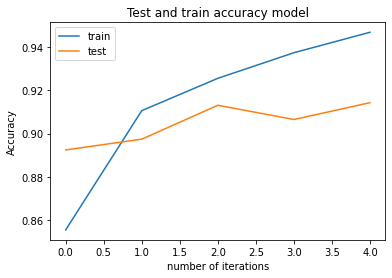

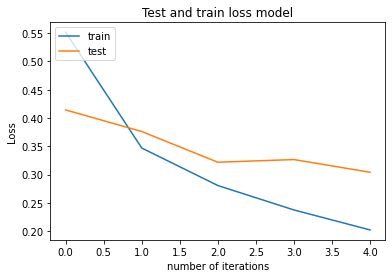

313/313 [==============================] - 2s 5ms/step - loss: 0.3042 - accuracy: 0.9143
Test loss:  0.30419906973838806
Test accuracy:  0.9143000245094299
[9 2 1 1 6]
[9 2 1 1 6]


In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)

model = Sequential()

model.add(Conv2D(64, kernel_size=3,kernel_regularizer=l2(1e-3), activation='relu', kernel_initializer='he_uniform',input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=3,kernel_regularizer=l2(1e-3) ,activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.02))
model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.02))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='Nadam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(df_train, df_ytrain, validation_data=(df_test, df_ytest), epochs=5, batch_size=128, callbacks=[callback])

#calculating the number of epochs run
print(len(history.history['loss']))

## plotting the accuracy model
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Test and train accuracy model')
plt.ylabel('Accuracy')
plt.xlabel('number of iterations')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

print('\n')

## plotting the loss model
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Test and train loss model')
plt.ylabel('Loss')
plt.xlabel('number of iterations')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

score = model.evaluate(df_test, df_ytest)

print('Test loss: ' ,score[0])
print('Test accuracy: ' ,score[1])

ypred = model.predict(df_test)

print(np.argmax(ypred, axis=1)[:5])
print(np.argmax(df_ytest, axis=1)[:5])

In [ ]:
## Random Normal

Epoch 1/5
469/469 [==============================] - 13s 24ms/step - loss: 0.9827 - accuracy: 0.8485 - val_loss: 0.7490 - val_accuracy: 0.8849
Epoch 2/5
469/469 [==============================] - 11s 23ms/step - loss: 0.6144 - accuracy: 0.9047 - val_loss: 0.5458 - val_accuracy: 0.9024
Epoch 3/5
469/469 [==============================] - 11s 24ms/step - loss: 0.4438 - accuracy: 0.9221 - val_loss: 0.4484 - val_accuracy: 0.9076
Epoch 4/5
469/469 [==============================] - 11s 23ms/step - loss: 0.3407 - accuracy: 0.9348 - val_loss: 0.3946 - val_accuracy: 0.9086
Epoch 5/5
469/469 [==============================] - 11s 24ms/step - loss: 0.2776 - accuracy: 0.9430 - val_loss: 0.3735 - val_accuracy: 0.9065
5


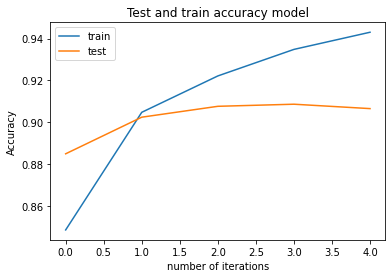

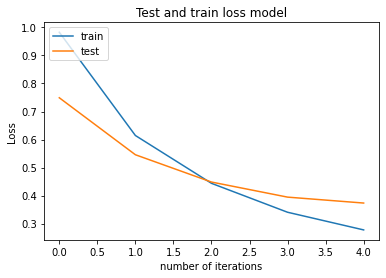

313/313 [==============================] - 2s 5ms/step - loss: 0.3735 - accuracy: 0.9065
Test loss:  0.3734865188598633
Test accuracy:  0.906499981880188
[9 2 1 1 6]
[9 2 1 1 6]


In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)
initializer = tf.keras.initializers.RandomNormal(mean=0., stddev=1.)


model = Sequential()

model.add(Conv2D(64, kernel_size=3,kernel_regularizer=l2(1e-3), activation='relu', kernel_initializer=initializer,input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=3,kernel_regularizer=l2(1e-3) ,activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.02))
model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.02))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='Nadam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(df_train, df_ytrain, validation_data=(df_test, df_ytest), epochs=5, batch_size=128, callbacks=[callback])

#calculating the number of epochs run
print(len(history.history['loss']))

## plotting the accuracy model
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Test and train accuracy model')
plt.ylabel('Accuracy')
plt.xlabel('number of iterations')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

print('\n')

## plotting the loss model
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Test and train loss model')
plt.ylabel('Loss')
plt.xlabel('number of iterations')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

score = model.evaluate(df_test, df_ytest)

print('Test loss: ' ,score[0])
print('Test accuracy: ' ,score[1])

ypred = model.predict(df_test)

print(np.argmax(ypred, axis=1)[:5])
print(np.argmax(df_ytest, axis=1)[:5])

In [ ]:
# Truncated Normal

Epoch 1/5
469/469 [==============================] - 14s 24ms/step - loss: 0.8223 - accuracy: 0.8536 - val_loss: 0.6419 - val_accuracy: 0.8827
Epoch 2/5
469/469 [==============================] - 11s 24ms/step - loss: 0.5122 - accuracy: 0.9071 - val_loss: 0.4704 - val_accuracy: 0.9033
Epoch 3/5
469/469 [==============================] - 11s 24ms/step - loss: 0.3818 - accuracy: 0.9238 - val_loss: 0.3976 - val_accuracy: 0.9110
Epoch 4/5
469/469 [==============================] - 11s 23ms/step - loss: 0.3034 - accuracy: 0.9367 - val_loss: 0.3777 - val_accuracy: 0.9085
Epoch 5/5
469/469 [==============================] - 11s 23ms/step - loss: 0.2536 - accuracy: 0.9456 - val_loss: 0.3545 - val_accuracy: 0.9103
5


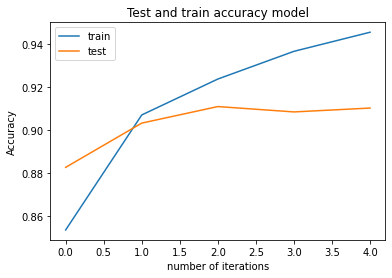

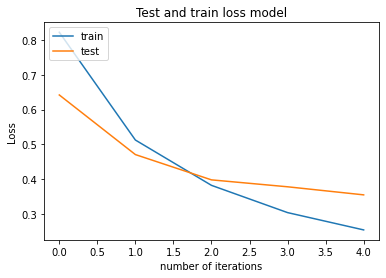

313/313 [==============================] - 2s 5ms/step - loss: 0.3545 - accuracy: 0.9103
Test loss:  0.354452908039093
Test accuracy:  0.9103000164031982
[9 2 1 1 6]
[9 2 1 1 6]


In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)
initializer = tf.keras.initializers.TruncatedNormal(mean=0., stddev=1.)


model = Sequential()

model.add(Conv2D(64, kernel_size=3,kernel_regularizer=l2(1e-3), activation='relu', kernel_initializer=initializer,input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=3,kernel_regularizer=l2(1e-3) ,activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.02))
model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.02))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='Nadam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(df_train, df_ytrain, validation_data=(df_test, df_ytest), epochs=5, batch_size=128, callbacks=[callback])

#calculating the number of epochs run
print(len(history.history['loss']))

## plotting the accuracy model
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Test and train accuracy model')
plt.ylabel('Accuracy')
plt.xlabel('number of iterations')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

print('\n')

## plotting the loss model
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Test and train loss model')
plt.ylabel('Loss')
plt.xlabel('number of iterations')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

score = model.evaluate(df_test, df_ytest)

print('Test loss: ' ,score[0])
print('Test accuracy: ' ,score[1])

ypred = model.predict(df_test)

print(np.argmax(ypred, axis=1)[:5])
print(np.argmax(df_ytest, axis=1)[:5])

## Activation Function

In [ ]:
# sigmoid

Epoch 1/5
469/469 [==============================] - 14s 24ms/step - loss: 0.5981 - accuracy: 0.8428 - val_loss: 0.4394 - val_accuracy: 0.8838
Epoch 2/5
469/469 [==============================] - 11s 23ms/step - loss: 0.3740 - accuracy: 0.9032 - val_loss: 0.3691 - val_accuracy: 0.8984
Epoch 3/5
469/469 [==============================] - 11s 23ms/step - loss: 0.3030 - accuracy: 0.9219 - val_loss: 0.3616 - val_accuracy: 0.8956
Epoch 4/5
469/469 [==============================] - 12s 25ms/step - loss: 0.2582 - accuracy: 0.9307 - val_loss: 0.3421 - val_accuracy: 0.9056
Epoch 5/5
469/469 [==============================] - 11s 23ms/step - loss: 0.2245 - accuracy: 0.9411 - val_loss: 0.3193 - val_accuracy: 0.9130
5


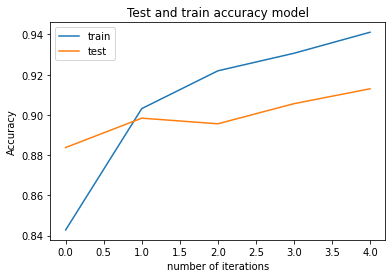

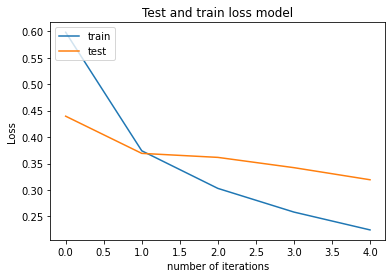

313/313 [==============================] - 2s 5ms/step - loss: 0.3193 - accuracy: 0.9130
Test loss:  0.31927812099456787
Test accuracy:  0.9129999876022339
[9 2 1 1 6]
[9 2 1 1 6]


In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)

model = Sequential()

model.add(Conv2D(64, kernel_size=3,kernel_regularizer=l2(1e-3), activation='relu', kernel_initializer="he_uniform",input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=3,kernel_regularizer=l2(1e-3) ,activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.02))
model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.02))
model.add(Dense(10, activation='sigmoid'))

model.compile(optimizer='Nadam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(df_train, df_ytrain, validation_data=(df_test, df_ytest), epochs=5, batch_size=128, callbacks=[callback])

#calculating the number of epochs run
print(len(history.history['loss']))

## plotting the accuracy model
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Test and train accuracy model')
plt.ylabel('Accuracy')
plt.xlabel('number of iterations')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

print('\n')

## plotting the loss model
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Test and train loss model')
plt.ylabel('Loss')
plt.xlabel('number of iterations')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

score = model.evaluate(df_test, df_ytest)

print('Test loss: ' ,score[0])
print('Test accuracy: ' ,score[1])

ypred = model.predict(df_test)

print(np.argmax(ypred, axis=1)[:5])
print(np.argmax(df_ytest, axis=1)[:5])

In [ ]:
# Linear

Epoch 1/5
469/469 [==============================] - 15s 24ms/step - loss: 10.1005 - accuracy: 0.1416 - val_loss: 11.2042 - val_accuracy: 0.1487
Epoch 2/5
469/469 [==============================] - 11s 23ms/step - loss: 11.2859 - accuracy: 0.1494 - val_loss: 10.1099 - val_accuracy: 0.1438
Epoch 3/5
469/469 [==============================] - 11s 23ms/step - loss: 10.5942 - accuracy: 0.1500 - val_loss: 11.2424 - val_accuracy: 0.1542
Epoch 4/5
469/469 [==============================] - 11s 24ms/step - loss: 9.6403 - accuracy: 0.1538 - val_loss: 9.4859 - val_accuracy: 0.1209
Epoch 5/5
469/469 [==============================] - 11s 23ms/step - loss: 8.4976 - accuracy: 0.1127 - val_loss: 7.9120 - val_accuracy: 0.1082
5


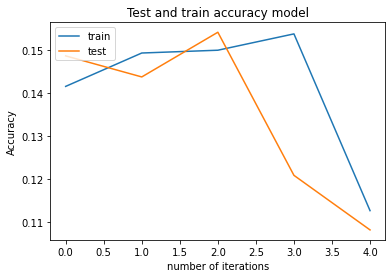

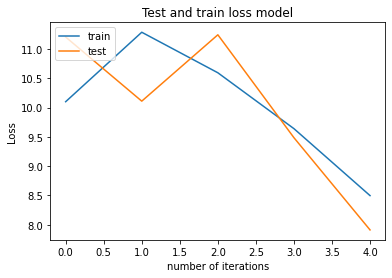

313/313 [==============================] - 2s 5ms/step - loss: 7.9120 - accuracy: 0.1082
Test loss:  7.9120025634765625
Test accuracy:  0.10819999873638153
[4 4 4 4 6]
[9 2 1 1 6]


In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)

model = Sequential()

model.add(Conv2D(64, kernel_size=3,kernel_regularizer=l2(1e-3), activation='relu', kernel_initializer="he_uniform",input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=3,kernel_regularizer=l2(1e-3) ,activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.02))
model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.02))
model.add(Dense(10, activation='linear'))

model.compile(optimizer='Nadam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(df_train, df_ytrain, validation_data=(df_test, df_ytest), epochs=5, batch_size=128, callbacks=[callback])

#calculating the number of epochs run
print(len(history.history['loss']))

## plotting the accuracy model
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Test and train accuracy model')
plt.ylabel('Accuracy')
plt.xlabel('number of iterations')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

print('\n')

## plotting the loss model
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Test and train loss model')
plt.ylabel('Loss')
plt.xlabel('number of iterations')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

score = model.evaluate(df_test, df_ytest)

print('Test loss: ' ,score[0])
print('Test accuracy: ' ,score[1])

ypred = model.predict(df_test)

print(np.argmax(ypred, axis=1)[:5])
print(np.argmax(df_ytest, axis=1)[:5])

In [ ]:
#Softmaxs

Epoch 1/5
469/469 [==============================] - 15s 25ms/step - loss: 0.5499 - accuracy: 0.8541 - val_loss: 0.4840 - val_accuracy: 0.8636
Epoch 2/5
469/469 [==============================] - 11s 23ms/step - loss: 0.3513 - accuracy: 0.9079 - val_loss: 0.3699 - val_accuracy: 0.8969
Epoch 3/5
469/469 [==============================] - 11s 23ms/step - loss: 0.2816 - accuracy: 0.9239 - val_loss: 0.3079 - val_accuracy: 0.9128
Epoch 4/5
469/469 [==============================] - 11s 23ms/step - loss: 0.2348 - accuracy: 0.9362 - val_loss: 0.3069 - val_accuracy: 0.9109
Epoch 5/5
469/469 [==============================] - 11s 23ms/step - loss: 0.2026 - accuracy: 0.9451 - val_loss: 0.3087 - val_accuracy: 0.9125
5


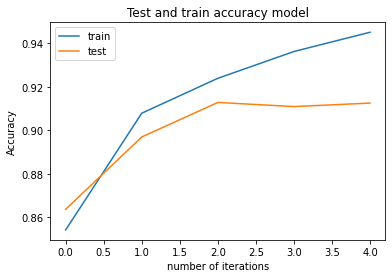

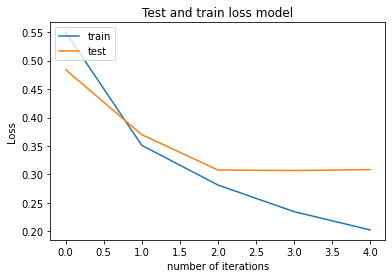

313/313 [==============================] - 2s 5ms/step - loss: 0.3087 - accuracy: 0.9125
Test loss:  0.30865567922592163
Test accuracy:  0.9125000238418579
[9 2 1 1 6]
[9 2 1 1 6]


In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)

model = Sequential()

model.add(Conv2D(64, kernel_size=3,kernel_regularizer=l2(1e-3), activation='relu', kernel_initializer="he_uniform",input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=3,kernel_regularizer=l2(1e-3) ,activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.02))
model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.02))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='Nadam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(df_train, df_ytrain, validation_data=(df_test, df_ytest), epochs=5, batch_size=128, callbacks=[callback])

#calculating the number of epochs run
print(len(history.history['loss']))

## plotting the accuracy model
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Test and train accuracy model')
plt.ylabel('Accuracy')
plt.xlabel('number of iterations')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

print('\n')

## plotting the loss model
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Test and train loss model')
plt.ylabel('Loss')
plt.xlabel('number of iterations')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


score = model.evaluate(df_test, df_ytest)

print('Test loss: ' ,score[0])
print('Test accuracy: ' ,score[1])

ypred = model.predict(df_test)

print(np.argmax(ypred, axis=1)[:5])
print(np.argmax(df_ytest, axis=1)[:5])

## Drop out values

In [ ]:
## Dropout 0.04

Epoch 1/5
469/469 [==============================] - 12s 24ms/step - loss: 0.5861 - accuracy: 0.8469 - val_loss: 0.4505 - val_accuracy: 0.8810
Epoch 2/5
469/469 [==============================] - 11s 23ms/step - loss: 0.3731 - accuracy: 0.9042 - val_loss: 0.3874 - val_accuracy: 0.8984
Epoch 3/5
469/469 [==============================] - 11s 23ms/step - loss: 0.3047 - accuracy: 0.9206 - val_loss: 0.3427 - val_accuracy: 0.9052
Epoch 4/5
469/469 [==============================] - 11s 23ms/step - loss: 0.2589 - accuracy: 0.9322 - val_loss: 0.3154 - val_accuracy: 0.9146
Epoch 5/5
469/469 [==============================] - 11s 23ms/step - loss: 0.2252 - accuracy: 0.9415 - val_loss: 0.3227 - val_accuracy: 0.9138
5


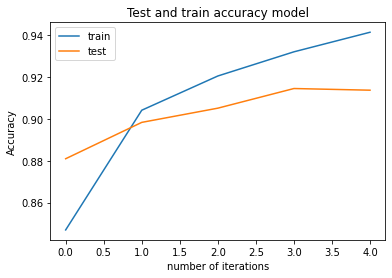

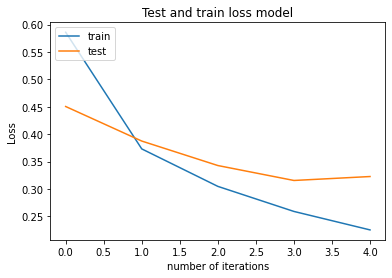

313/313 [==============================] - 2s 5ms/step - loss: 0.3227 - accuracy: 0.9138
Test loss:  0.32265323400497437
Test accuracy:  0.9138000011444092
[9 2 1 1 6]
[9 2 1 1 6]


In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)
initializer = tf.keras.initializers.RandomNormal(mean=0., stddev=1.)


model = Sequential()

model.add(Conv2D(64, kernel_size=3,kernel_regularizer=l2(1e-3), activation='relu', kernel_initializer="he_uniform",input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=3,kernel_regularizer=l2(1e-3) ,activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.04))
model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.04))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='Nadam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(df_train, df_ytrain, validation_data=(df_test, df_ytest), epochs=5, batch_size=128, callbacks=[callback])

#calculating the number of epochs run
print(len(history.history['loss']))

## plotting the accuracy model
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Test and train accuracy model')
plt.ylabel('Accuracy')
plt.xlabel('number of iterations')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

print('\n')

## plotting the loss model
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Test and train loss model')
plt.ylabel('Loss')
plt.xlabel('number of iterations')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


score = model.evaluate(df_test, df_ytest)

print('Test loss: ' ,score[0])
print('Test accuracy: ' ,score[1])

ypred = model.predict(df_test)

print(np.argmax(ypred, axis=1)[:5])
print(np.argmax(df_ytest, axis=1)[:5])

In [ ]:
## Dropout 0.08

Epoch 1/5
469/469 [==============================] - 14s 24ms/step - loss: 0.6094 - accuracy: 0.8425 - val_loss: 0.4354 - val_accuracy: 0.8872
Epoch 2/5
469/469 [==============================] - 11s 23ms/step - loss: 0.3891 - accuracy: 0.9000 - val_loss: 0.3664 - val_accuracy: 0.9014
Epoch 3/5
469/469 [==============================] - 11s 23ms/step - loss: 0.3217 - accuracy: 0.9151 - val_loss: 0.3313 - val_accuracy: 0.9105
Epoch 4/5
469/469 [==============================] - 11s 23ms/step - loss: 0.2776 - accuracy: 0.9250 - val_loss: 0.3289 - val_accuracy: 0.9082
Epoch 5/5
469/469 [==============================] - 11s 23ms/step - loss: 0.2440 - accuracy: 0.9341 - val_loss: 0.3175 - val_accuracy: 0.9142
5


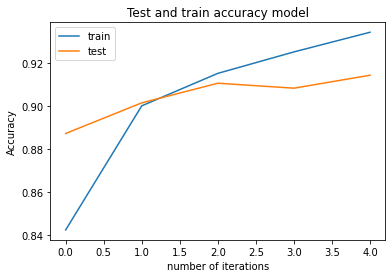

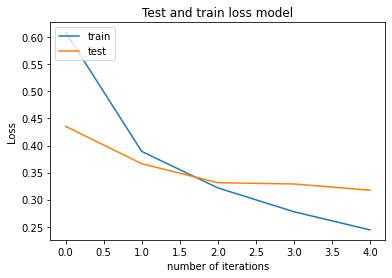

313/313 [==============================] - 2s 5ms/step - loss: 0.3175 - accuracy: 0.9142
Test loss:  0.31752610206604004
Test accuracy:  0.9142000079154968
[9 2 1 1 6]
[9 2 1 1 6]


In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)
initializer = tf.keras.initializers.RandomNormal(mean=0., stddev=1.)


model = Sequential()

model.add(Conv2D(64, kernel_size=3,kernel_regularizer=l2(1e-3), activation='relu', kernel_initializer="he_uniform",input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=3,kernel_regularizer=l2(1e-3) ,activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.08))
model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.08))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='Nadam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(df_train, df_ytrain, validation_data=(df_test, df_ytest), epochs=5, batch_size=128, callbacks=[callback])

#calculating the number of epochs run
print(len(history.history['loss']))

## plotting the accuracy model
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Test and train accuracy model')
plt.ylabel('Accuracy')
plt.xlabel('number of iterations')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

print('\n')

## plotting the loss model
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Test and train loss model')
plt.ylabel('Loss')
plt.xlabel('number of iterations')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


score = model.evaluate(df_test, df_ytest)

print('Test loss: ' ,score[0])
print('Test accuracy: ' ,score[1])

ypred = model.predict(df_test)

print(np.argmax(ypred, axis=1)[:5])
print(np.argmax(df_ytest, axis=1)[:5])

In [ ]:
## Dropout 0.01

Epoch 1/5
469/469 [==============================] - 14s 24ms/step - loss: 0.5679 - accuracy: 0.8518 - val_loss: 0.4417 - val_accuracy: 0.8846
Epoch 2/5
469/469 [==============================] - 11s 24ms/step - loss: 0.3584 - accuracy: 0.9077 - val_loss: 0.3818 - val_accuracy: 0.8911
Epoch 3/5
469/469 [==============================] - 11s 23ms/step - loss: 0.2881 - accuracy: 0.9236 - val_loss: 0.3334 - val_accuracy: 0.9091
Epoch 4/5
469/469 [==============================] - 11s 23ms/step - loss: 0.2424 - accuracy: 0.9362 - val_loss: 0.3078 - val_accuracy: 0.9159
Epoch 5/5
469/469 [==============================] - 11s 23ms/step - loss: 0.2055 - accuracy: 0.9463 - val_loss: 0.3000 - val_accuracy: 0.9161
5


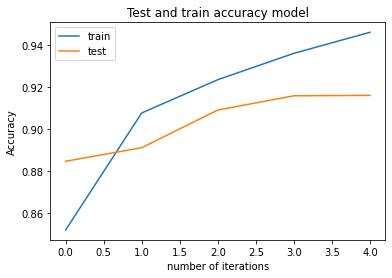

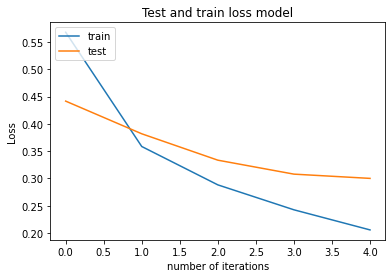

313/313 [==============================] - 2s 5ms/step - loss: 0.3000 - accuracy: 0.9161
Test loss:  0.30000582337379456
Test accuracy:  0.916100025177002
[9 2 1 1 6]
[9 2 1 1 6]


In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)
initializer = tf.keras.initializers.RandomNormal(mean=0., stddev=1.)


model = Sequential()

model.add(Conv2D(64, kernel_size=3,kernel_regularizer=l2(1e-3), activation='relu', kernel_initializer="he_uniform",input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=3,kernel_regularizer=l2(1e-3) ,activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.01))
model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.01))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='Nadam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(df_train, df_ytrain, validation_data=(df_test, df_ytest), epochs=5, batch_size=128, callbacks=[callback])

#calculating the number of epochs run
print(len(history.history['loss']))

## plotting the accuracy model
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Test and train accuracy model')
plt.ylabel('Accuracy')
plt.xlabel('number of iterations')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

print('\n')

## plotting the loss model
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Test and train loss model')
plt.ylabel('Loss')
plt.xlabel('number of iterations')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


score = model.evaluate(df_test, df_ytest)

print('Test loss: ' ,score[0])
print('Test accuracy: ' ,score[1])

ypred = model.predict(df_test)

print(np.argmax(ypred, axis=1)[:5])
print(np.argmax(df_ytest, axis=1)[:5])

In [ ]:
## Dropout 0.02

Epoch 1/5
469/469 [==============================] - 14s 25ms/step - loss: 0.5843 - accuracy: 0.8470 - val_loss: 0.4519 - val_accuracy: 0.8829
Epoch 2/5
469/469 [==============================] - 11s 23ms/step - loss: 0.3722 - accuracy: 0.9046 - val_loss: 0.3984 - val_accuracy: 0.8897
Epoch 3/5
469/469 [==============================] - 11s 23ms/step - loss: 0.3007 - accuracy: 0.9203 - val_loss: 0.3434 - val_accuracy: 0.9045
Epoch 4/5
469/469 [==============================] - 11s 23ms/step - loss: 0.2530 - accuracy: 0.9330 - val_loss: 0.3133 - val_accuracy: 0.9117
Epoch 5/5
469/469 [==============================] - 11s 23ms/step - loss: 0.2177 - accuracy: 0.9421 - val_loss: 0.3134 - val_accuracy: 0.9118
5


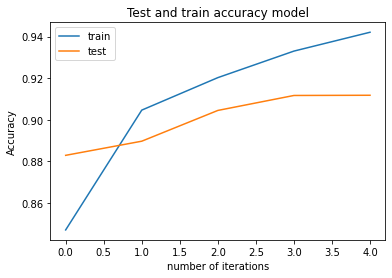

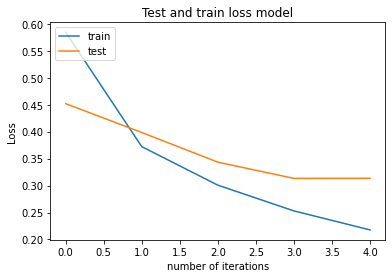

313/313 [==============================] - 2s 5ms/step - loss: 0.3134 - accuracy: 0.9118
Test loss:  0.3134288489818573
Test accuracy:  0.9118000268936157
[9 2 1 1 6]
[9 2 1 1 6]


In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)
initializer = tf.keras.initializers.RandomNormal(mean=0., stddev=1.)


model = Sequential()

model.add(Conv2D(64, kernel_size=3,kernel_regularizer=l2(1e-3), activation='relu', kernel_initializer="he_uniform",input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=3,kernel_regularizer=l2(1e-3) ,activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.02))
model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.02))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='Nadam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(df_train, df_ytrain, validation_data=(df_test, df_ytest), epochs=5, batch_size=128, callbacks=[callback])

#calculating the number of epochs run
print(len(history.history['loss']))

## plotting the accuracy model
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Test and train accuracy model')
plt.ylabel('Accuracy')
plt.xlabel('number of iterations')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

print('\n')

## plotting the loss model
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Test and train loss model')
plt.ylabel('Loss')
plt.xlabel('number of iterations')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


score = model.evaluate(df_test, df_ytest)

print('Test loss: ' ,score[0])
print('Test accuracy: ' ,score[1])

ypred = model.predict(df_test)

print(np.argmax(ypred, axis=1)[:5])
print(np.argmax(df_ytest, axis=1)[:5])

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import AveragePooling2D

# Increasing the data set x4 by augmentation

In [ ]:
print(df_test.shape, df_train.shape, df_ytrain.shape, df_ytest.shape)

(10000, 28, 28, 1) (60000, 28, 28, 1) (60000, 10) (10000, 10)


In [ ]:
from keras_preprocessing.image import ImageDataGenerator

In [ ]:
## one hot encoding the y labels

In [ ]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False, drop = "first")
encoder.fit(df_ytrain)
encodedtrain = encoder.transform(df_ytrain)

encoder.fit(df_ytest)
encodedtest = encoder.transform(df_ytest)

In [ ]:
data_gen = ImageDataGenerator(rotation_range=45)

In [ ]:
augmentdata = data_gen.flow(df_train, encodedtrain, batch_size=60000)

traindata = np.copy(df_train) 
trainlabel = np.copy(encodedtrain)
for i in range(3):
    newimages = augmentdata.next() 
    traindata = np.concatenate((traindata, newimages[0])) 
    trainlabel = np.concatenate((trainlabel, newimages[1]))

print(np.shape(traindata)) 
print(np.shape(trainlabel)) 

print(traindata.shape)
print(trainlabel.shape) 


(240000, 28, 28, 1)
(240000, 10)
(240000, 28, 28, 1)
(240000, 10)


In [ ]:
augmentdata1 = data_gen.flow(df_test, encodedtest, batch_size=10000)

testdata = np.copy(df_test) 
testlabel = np.copy(encodedtest)
for i in range(3):
    new_images = augmentdata1.next() 
    testdata = np.concatenate((testdata, new_images[0])) 
    testlabel = np.concatenate((testlabel, new_images[1]))

print(np.shape(testdata))
print(np.shape(testlabel)) 

(40000, 28, 28, 1)
(40000, 10)


In [ ]:
print(testdata.shape, traindata.shape, trainlabel.shape, testlabel.shape)

(40000, 28, 28, 1) (240000, 28, 28, 1) (240000, 10) (40000, 10)


Epoch 1/5
1875/1875 [==============================] - 51s 27ms/step - loss: 0.5874 - accuracy: 0.8338 - val_loss: 0.4771 - val_accuracy: 0.8615
Epoch 2/5
1875/1875 [==============================] - 52s 28ms/step - loss: 0.3992 - accuracy: 0.8839 - val_loss: 0.4357 - val_accuracy: 0.8680
Epoch 3/5
1875/1875 [==============================] - 52s 28ms/step - loss: 0.3454 - accuracy: 0.8973 - val_loss: 0.3965 - val_accuracy: 0.8801
Epoch 4/5
1875/1875 [==============================] - 54s 29ms/step - loss: 0.3166 - accuracy: 0.9040 - val_loss: 0.3881 - val_accuracy: 0.8822
Epoch 5/5
1875/1875 [==============================] - 50s 27ms/step - loss: 0.2985 - accuracy: 0.9092 - val_loss: 0.3789 - val_accuracy: 0.8855


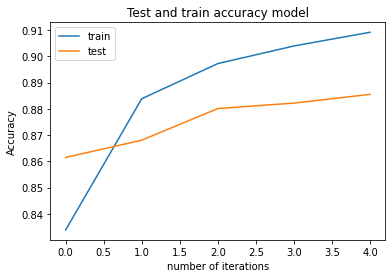

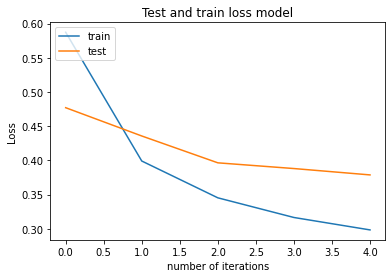

1250/1250 [==============================] - 7s 5ms/step - loss: 0.3789 - accuracy: 0.8855
Test loss:  0.378852903842926
Test accuracy:  0.8855249881744385
[9 2 1 1 6]
[9 2 1 1 6]


In [ ]:
opt = keras.optimizers.Nadam(learning_rate=0.001)


model = Sequential()

model.add(Conv2D(64, padding = 'same', kernel_size=4, kernel_regularizer=l2(1e-3), activation='relu', kernel_initializer="he_uniform", input_shape=(28,28,1)))
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Dropout(0.08))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=3,kernel_regularizer=l2(1e-3) ,activation='relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Conv2D(32, kernel_size=3,kernel_regularizer=l2(1e-3) ,activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.02))
model.add(Flatten())
model.add(Dropout(0.02))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(traindata, trainlabel, validation_data=(testdata, testlabel), epochs=5, batch_size=128)

#calculating the number of epochs run
# print(len(history.history['loss']))

## plotting the accuracy model
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Test and train accuracy model')
plt.ylabel('Accuracy')
plt.xlabel('number of iterations')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

print('\n')

## plotting the loss model
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Test and train loss model')
plt.ylabel('Loss')
plt.xlabel('number of iterations')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


score = model.evaluate(testdata, testlabel)

print('Test loss: ' ,score[0])
print('Test accuracy: ' ,score[1])

ypred = model.predict(testdata)

print(np.argmax(ypred, axis=1)[:5])
print(np.argmax(df_ytest, axis=1)[:5])